In [1]:
import numpy as np
from scipy.stats import beta
import matplotlib.pyplot as plt
import pandas as pd
import pandas as pd 
import WPB_98_NC as WPB
import datetime
import os
import matplotlib
matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20) 

def p2f(x,dtype): 
  x1=np.array(x,dtype=dtype,order='F')
  return x1.copy()
def TemperatureParser(start_date,end_date,LUN,Tmin_csv,Tmax_csv,CWD,WPB_LUT):
    Dates=Tmax_csv['Dates']
    LU=WPB_LUT[WPB_LUT.Location==locations[LUN]]
    L=LU.Location
    Tmax_One=Tmax_csv[L]
    Tmin_One=Tmin_csv[L]
    CWD_One=CWD[L]
    Temp_LUT=pd.concat([Tmax_One.reset_index(drop=True),Dates.reset_index(drop=True)],axis=1)
    Temp_LUT=pd.concat([Temp_LUT.reset_index(drop=True),Tmin_One.reset_index(drop=True)],axis=1)
    Temp_LUT=pd.concat([Temp_LUT.reset_index(drop=True),CWD_One.reset_index(drop=True)],axis=1)
    Temp_LUT=Temp_LUT.sort_values('Dates')
    Temp_LUT['Dates'] = pd.to_datetime(Temp_LUT['Dates'])
    mask = (Temp_LUT['Dates'] > start_date) & (Temp_LUT['Dates'] <= end_date)
    Temp_LUT = Temp_LUT.loc[mask]

    #Temp_LUT=Temp_LUT[273:len(Temp_LUT)] ###Start Oct1
    ntgeq317=np.int(LU.Initial_above_20)
    ntgeq00=np.int(LU.Initial_below_20)
    return(Temp_LUT.iloc[:,2],Temp_LUT.iloc[:,0],Temp_LUT.iloc[:,3],ntgeq317,ntgeq00)


In [2]:

    
    
WPB_LUT=pd.read_csv('WPB_Inputs/WPB_Trees_6_20.csv')
#### Subset to two zones
WPB_LUT=WPB_LUT[WPB_LUT['Location'].isin(['UpperMed','UpperLow','LowerLow','LowerMed'])]
###update Lookup numbers
WPB_LUT.LUN=list(range(1,21))
#print(WPB_LUT)
locations=WPB_LUT.Location.unique()
### Temperature Max
Tmax_csv=pd.read_csv('WPB_Inputs/Tmax_Historic.csv')
#print(list(Tmax_csv.columns))
#Tmax_csv=Tmax_csv.rename(columns={'Unnamed: 0':"Unnamed",'Dates':"Dates",
#                'Low_LowElShape_Out':"LowerLow",
#                'Low_MedElShape_Out':"LowerMed",
#                'Low_HighElShape_Out':"LowerHigh",
#                'High_LowElShape_Out':"UpperLow",
#                'High_MedElShape_Out':"UpperMed",
#                'High_HighElShape_Out':"UpperHigh"})
Tmax_csv.sort_values(by=['Dates'],inplace=True)
### Temperature Min 
Tmin_csv=pd.read_csv('WPB_Inputs/Tmin_Historic.csv')
#Tmin_csv=Tmin_csv.rename(columns={'Unnamed: 0':"Unnamed",'Dates':"Dates",
#                'Low_LowElShape_Out':"LowerLow",
#                'Low_MedElShape_Out':"LowerMed",
#                'Low_HighElShape_Out':"LowerHigh",
#                'High_LowElShape_Out':"UpperLow",
#                'High_MedElShape_Out':"UpperMed",
#                'High_HighElShape_Out':"UpperHigh"})
Tmin_csv.sort_values(by=['Dates'],inplace=True)
#print(Tmin_csv.Dates)



### Drought
Drought_csv=pd.read_csv('WPB_Inputs/MI_SPI_6_20.csv')
Drought_csv=Drought_csv.rename(columns={'Unnamed: 0':"Unnamed",'Dates':"Dates",
                'LE_LL':"LowerLow",
                'HE_LL':"LowerMed",
                'LE_HL':"UpperLow",
                'HE_HL':"UpperMed"})




### Drought
Drought_csv=pd.read_csv('WPB_Inputs/MI_SPI_6_20.csv')
Drought_csv=Drought_csv.rename(columns={'Unnamed: 0':"Unnamed",'Dates':"Dates",
                'LE_LL':"LowerLow",
                'HE_LL':"LowerMed",
                'LE_HL':"UpperLow",
                'HE_HL':"UpperMed"})



Drought_csv.sort_values(by=['Dates'],inplace=True)
mask = (Drought_csv['Dates'] > "2001-11-01") & (Drought_csv['Dates'] <= "2018-12-31")
Drought_csv=Drought_csv.loc[mask]

CWD=Drought_csv
Dates=pd.DataFrame(Tmax_csv.Dates)
#print(CWD)

C:\Users\zjrobbin\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  


In [3]:
#WPBs=[00.165911037,8.8141207712597,1.38696142549599,
#   0.884874389079065, 721.071807324097, 449.846458472556]
#WPBs=[0.079126130753128,7.0330288085055,1.45199719015292,
#    0.709615407113012,1204.62683455295,8653.42406210267]
WPBs=[00.1953159,10.0832,1.49109105020809,
  0.880150419367536,739.920274663474, 485.56258748702]
WPBs=[0.191185149574986,10.9500315820153,1.49944211012615,1.04917045536438,
     1061.31175879697,581.774971842218]

WPBs=[0.20763138027789546, 10.688412913462386, 1.5907637175830858, 1.4842775167330462, 618.7918561574907, 1915.5930806484]
WPBs=[0.177067673807376,7.31519641610276,1.93660410811632,0.0979749838831105,806.717275007852,0.956980767690019]
start_date = '10-01-2001'
end_date = '12-31-2018'
LUN1=0
SubMin,SubMax,CWDvec,ntgeq317,ntgeq00 =TemperatureParser(start_date,end_date,LUN1,Tmin_csv,Tmax_csv,CWD,WPB_LUT)

x0=WPBs[1]
x1=WPBs[2]
x2=WPBs[3]

r1=WPBs[0]
tparents=WPBs[4]
SizeFactor=WPBs[5]

NGEQ20vec,NGEQ00vec,Flight,Fec,Eggs,L1,L2,Pout,Ten,Adults=WPB.mpbfit(p2f(SubMin,"cdouble"),#TempMin
                p2f(SubMax,"cdouble"),#TempMax
                p2f(r1,"float"), #phi1
                p2f(x0,"float"),
                p2f(x1,"float"),
                p2f(CWDvec,"cdouble"),
                p2f(x2,"float"),
                p2f(SizeFactor,"float"),
                p2f(ntgeq317,"float"),
                p2f(ntgeq00,"float"),
                p2f(tparents,"float"))


C:\Users\zjrobbin\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:35: ComplexWarning: Casting complex values to real discards the imaginary part


In [14]:

### Veiw window /
Xlim=[datetime.date(2001,1,15), datetime.date(2018,12, 1)]
Times=pd.date_range('2001-11-15', periods=len(SubMin), freq='d')



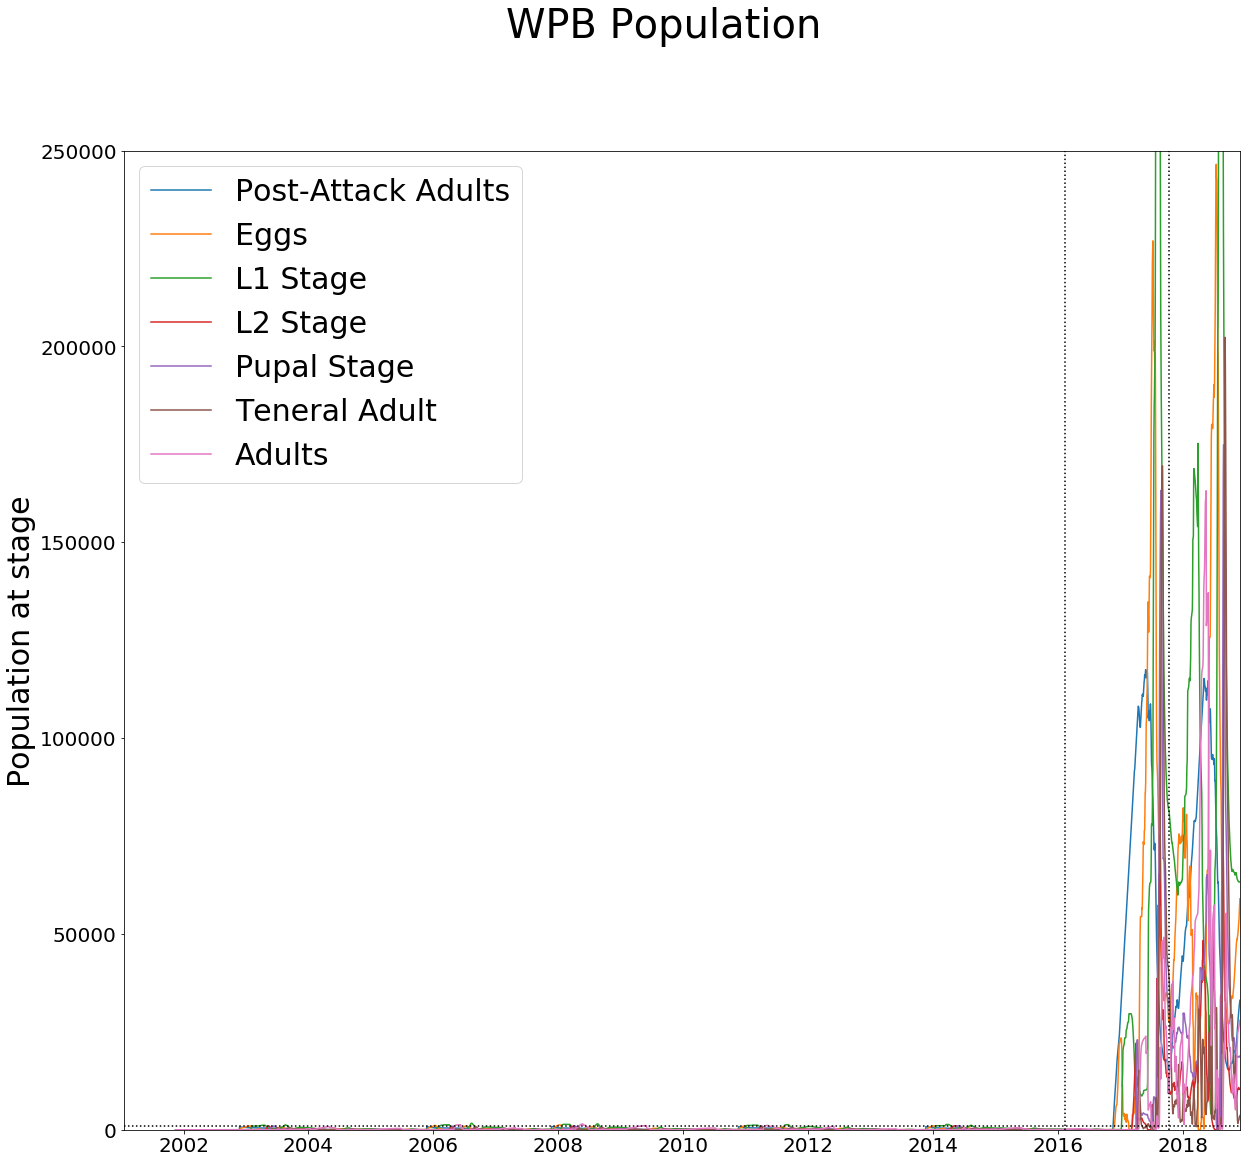

In [16]:
fig = plt.figure(figsize=(20,20))
#fig = plt.figure(figsize=(20,20))
fig.autofmt_xdate()
ax = fig.add_subplot(1,1,1)
### Correct plotting method
plt.ylim(0,250000)
plt.xlim(Xlim)
plt.suptitle("WPB Population",fontsize=40)
#ax.plot(Fec)
#plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
#plt.gca().xaxis.set_major_locator(mdates.DayLocator(i
#Eggs.set_index(pd.to_datetime(dateoption))
ax.plot(Times,Fec/24,label="Post-Attack Adults")
ax.plot(Times,Eggs,label="Eggs")
#ax.plot(Times,(Eggs/.1428527)/24,label="Successful Beetle Attacks")
ax.plot(Times,L1,label="L1 Stage")
ax.plot(Times,L2,label="L2 Stage")
#ax.plot(Times,L3,label="L3 Stage")
#ax.plot(Times,L4,label="L4 Stage")

ax.plot(Times,Pout,label="Pupal Stage")
ax.plot(Times,Ten,label="Teneral Adult")
ax.plot(Times,Adults,label="Adults")
#ax.bar(Times,Flight,label="Beetles in Flight")
plt.axvline('2017-10-11', color='black',linestyle='dotted')
plt.axvline('2016-02-11', color='black',linestyle='dotted')
#plt.text(124, 2000, "Feburary 1st", rotation=90, verticalalignment='center')
plt.axhline(1000, color='black',linestyle='dotted')
#plt.text(213, 2000, "July 1st", rotation=90, verticalalignment='center')
#plt.axvline(213, color='black',linestyle='dotted')
#plt.text(365, 2000, "December 1st", rotation=90, verticalalignment='center')
ax.legend( prop={'size': 30})
#plt.ylabel("Trees surviving",fontsize=40)
plt.tick_params(labelsize=20)
plt.ylabel("Population at stage",fontsize=30)
plt.savefig("Images/WPB_Population.png")

Text(0, 0.5, 'Population at stage')

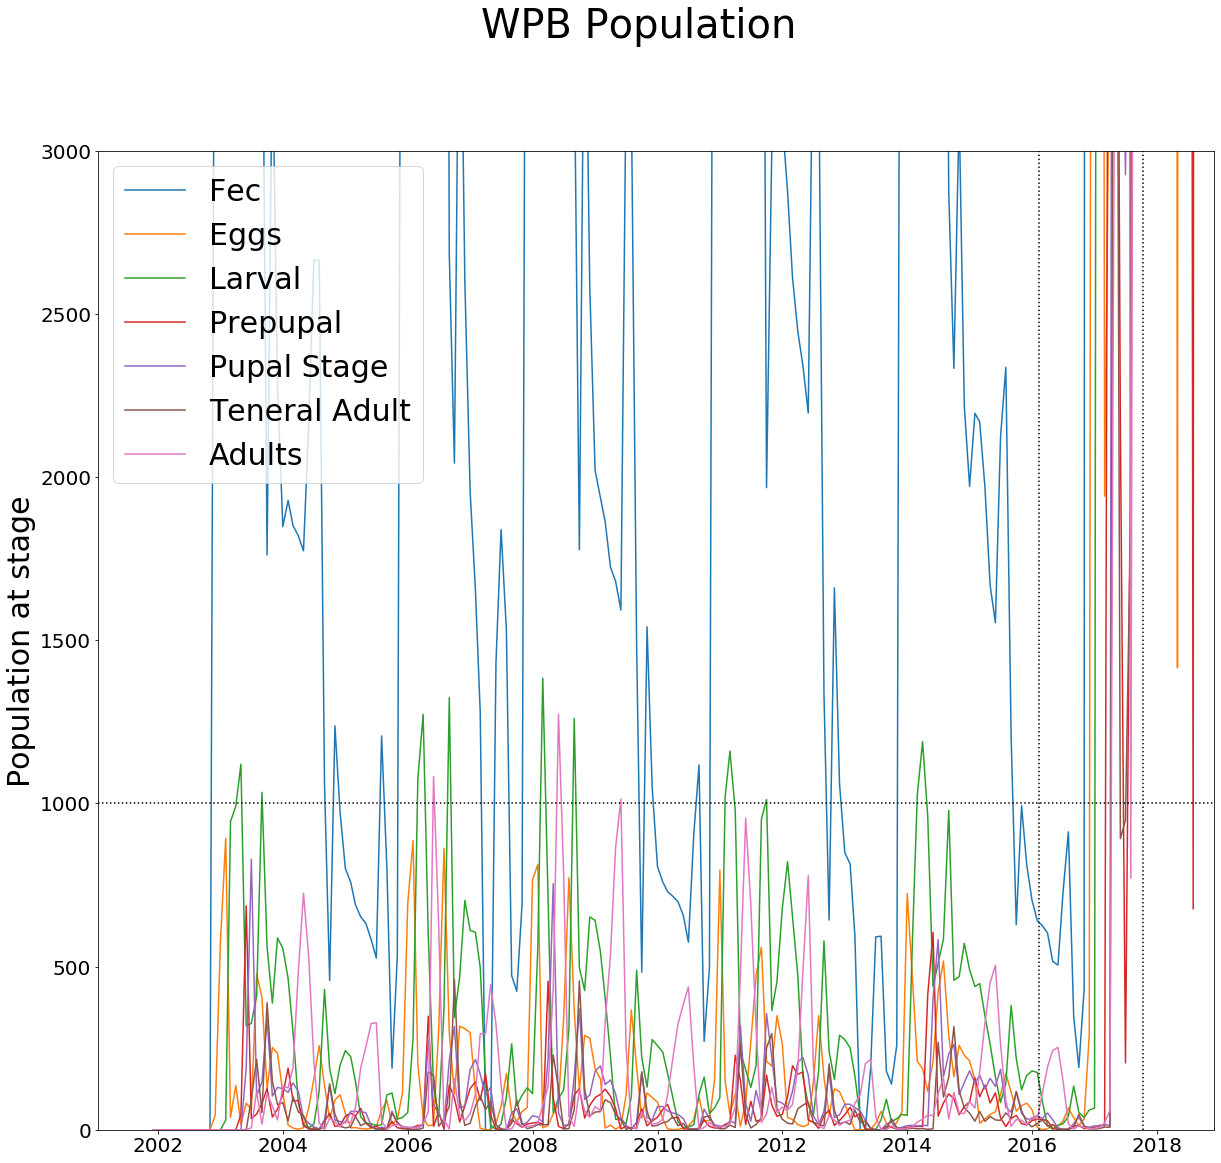

In [26]:
Population=pd.DataFrame(data={"Fec":Fec,"Flight":Flight,"Eggs":Eggs,"L1":L1,"L2":L2,"Adults":Adults,"Pout":Pout,"Ten":Ten})
Population.index=pd.to_datetime(Times)
Prs=Population.resample('M').mean()
fig = plt.figure(figsize=(20,20))
#fig = plt.figure(figsize=(20,20))
fig.autofmt_xdate()
ax = fig.add_subplot(1,1,1)
### Correct plotting method
plt.ylim(0,3000)
plt.xlim(Xlim)
plt.suptitle("WPB Population",fontsize=40)
#ax.plot(Fec)
#plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
#plt.gca().xaxis.set_major_locator(mdates.DayLocator(i
#Eggs.set_index(pd.to_datetime(dateoption))
ax.plot(Prs.index,Prs.Fec,label="Fec")
ax.plot(Prs.index,Prs.Eggs,label="Eggs")
#ax.plot(Times,(Eggs/.1428527)/24,label="Successful Beetle Attacks")
ax.plot(Prs.index,Prs.L1,label="Larval")
ax.plot(Prs.index,Prs.L2,label="Prepupal")
#ax.plot(Times,L3,label="L3 Stage")
#ax.plot(Times,L4,label="L4 Stage")

ax.plot(Prs.index,Prs.Pout,label="Pupal Stage")
ax.plot(Prs.index,Prs.Ten,label="Teneral Adult")
ax.plot(Prs.index,Prs.Adults,label="Adults")
#ax.bar(Times,Flight,label="Beetles in Flight")
plt.axvline('2017-10-11', color='black',linestyle='dotted')
plt.axvline('2016-02-11', color='black',linestyle='dotted')
#plt.text(124, 2000, "Feburary 1st", rotation=90, verticalalignment='center')
plt.axhline(1000, color='black',linestyle='dotted')
#plt.text(213, 2000, "July 1st", rotation=90, verticalalignment='center')
#plt.axvline(213, color='black',linestyle='dotted')
#plt.text(365, 2000, "December 1st", rotation=90, verticalalignment='center')
ax.legend( prop={'size': 30})
#plt.ylabel("Trees surviving",fontsize=40)
plt.tick_params(labelsize=20)
plt.ylabel("Population at stage",fontsize=30)

<BarContainer object of 19 artists>

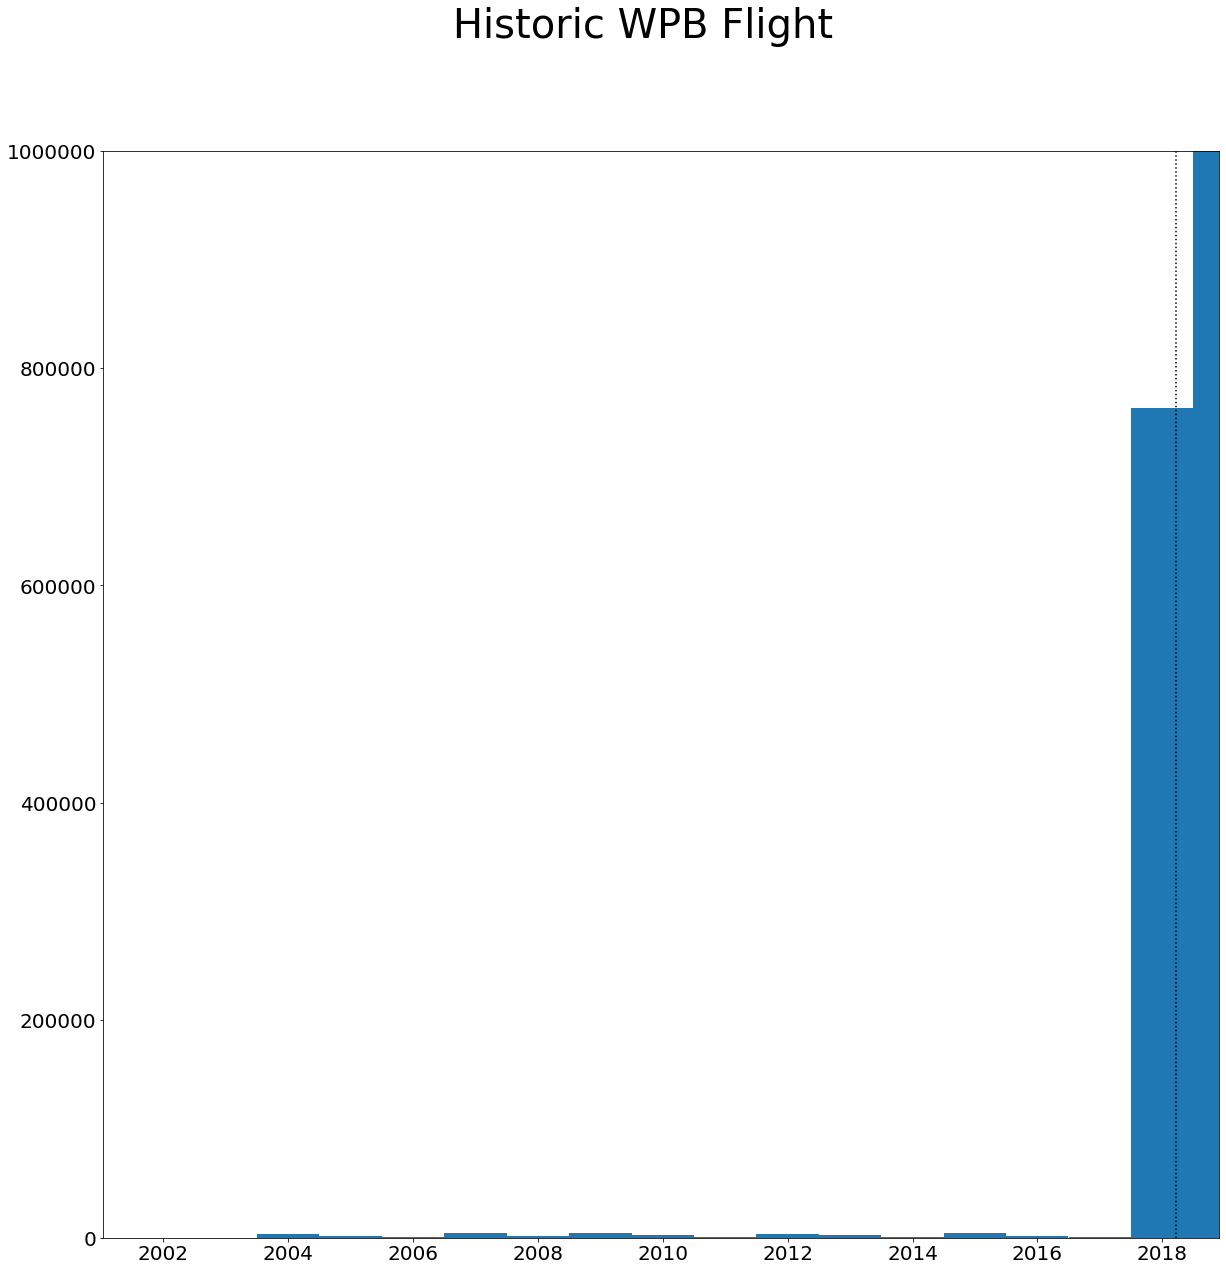

In [18]:
flight=pd.DataFrame(data={"Flight":Flight})
flight.index=pd.to_datetime(Times)
Frs=flight.resample('Y').sum()
#print(Frs)
fig = plt.figure(figsize=(20,20))
#fig = plt.figure(figsize=(20,20))
#fig.autofmt_xdate()a

ax = fig.add_subplot(1,1,1)
plt.ylim(0,1000000)
plt.xlim(Xlim)
plt.suptitle("Historic WPB Flight",fontsize=40)
#ax.plot(Fec)
#plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
#plt.gca().xaxis.set_major_locator(mdates.DayLocator(i
#Eggs.set_index(pd.to_datetime(dateoption))
#ax.plot(Times,Fec,label="Fec")
#ax.plot(Times,Eggs,label="Eggs",linewidth=10)
#ax.plot(Times,(Eggs/.1428527)/24,label="Successful Beetle Attacks")
#ax.plot(Times,L1,label="L1 Stage")
#ax.plot(Times,L2,label="L2 Stage",linewidth=10)
#ax.plot(Times,L3,label="L3 Stage")
#ax.plot(Times,L4,label="L4 Stage")
plt.axvline('2018-03-21', color='black',linestyle='dotted')
#ax.plot(Times,Pout,label="Pupal Stage")
#ax.plot(Times,Ten,label="Teneral Adult")
#ax.plot(Times,Adults,label="Adults",linewidth=10)
ax.bar(x=Frs.index,height=Frs.Flight,label="Beetles in Flight",width=1)
#ax.bar(x=Times,height=flight.Flight,label="Beetles in Flight",width=5.5)
#print(Frs)

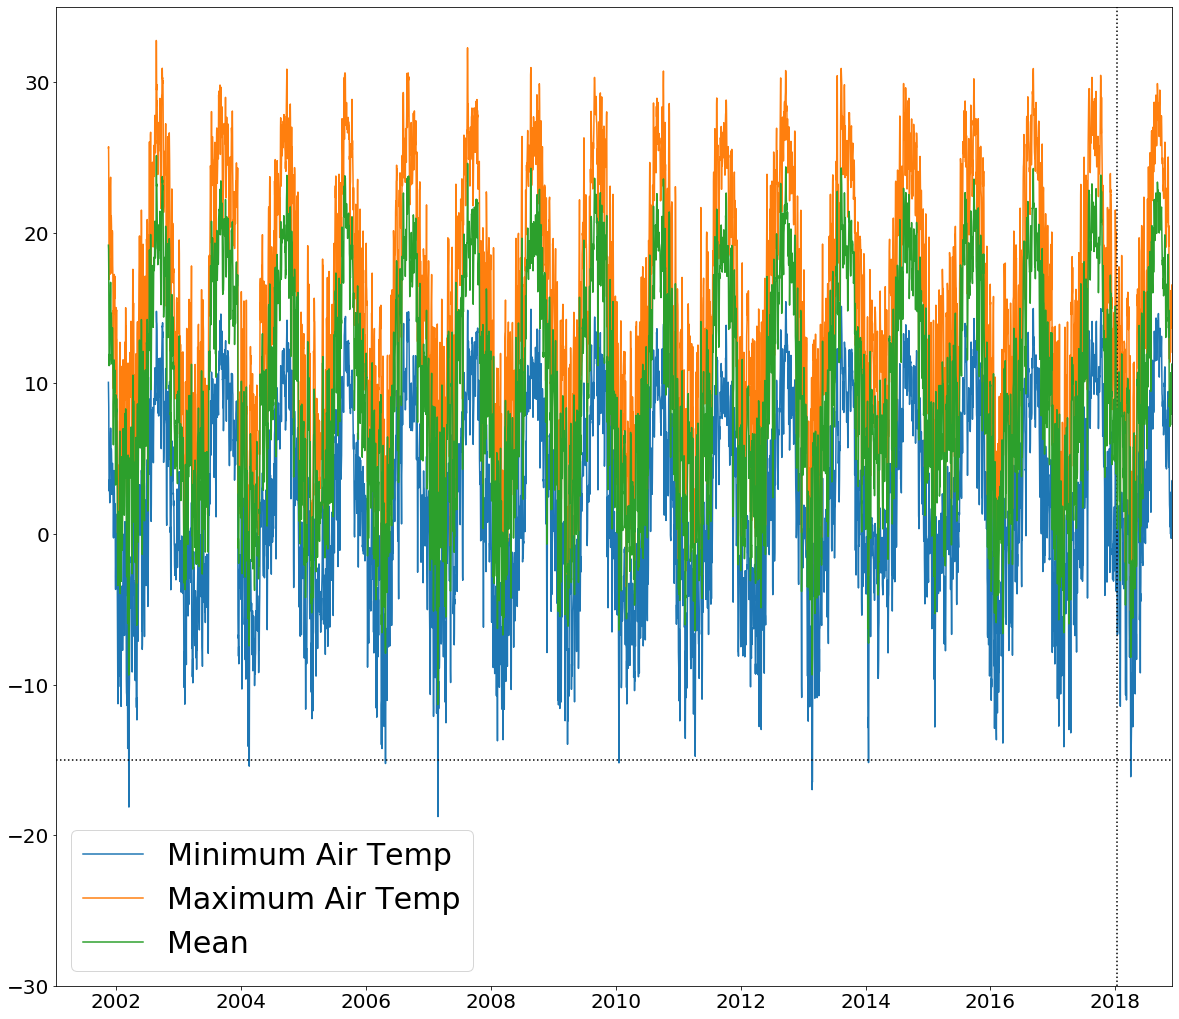

In [19]:

fig = plt.figure(figsize=(20,20))
fig.autofmt_xdate()
ax = fig.add_subplot(1,1,1)
plt.ylim(-30,35)
plt.xlim(Xlim)
ax.plot(Times,SubMin,label="Minimum Air Temp")
ax.plot(Times,SubMax,label="Maximum Air Temp")

plt.axvline('2018-1-11', color='black',linestyle='dotted')
Undermax=SubMax + (SubMax - SubMin)/24.4
Tmean2=0.5*(SubMax + SubMin) +  2.3*(SubMax - SubMin)/(2.0*36.60)
Tmax2 = SubMax  + 0.9* (SubMax  - SubMin)/16.6
Tmin2 = SubMin + 1.8
Tmean=(Tmax2+Tmin2)*.5



#plt.axvline('2017-10-11', color='black',linestyle='dotted')
#plt.axhline(12.78, color='black',linestyle='dotted')
#plt.axvline('2005-04-01', color='black',linestyle='dotted')
ax.plot(Times,Tmean,label="Mean")
#ax.plot(Times,Tmean2)
ax.legend()
ax.legend( prop={'size': 30})
#ax.axhline(0, color='black',linestyle='dotted')
ax.axhline(-15.0, color='black',linestyle='dotted')
#ax.axhline(18.6, color='black',linestyle='dotted')
#ax.axhline(10.0, color='black',linestyle='dotted')

In [20]:

np.array([(SubMax-SubMin)]).max()
np.percentile(np.array([(SubMax-SubMin)]),95)

16.911953539390474

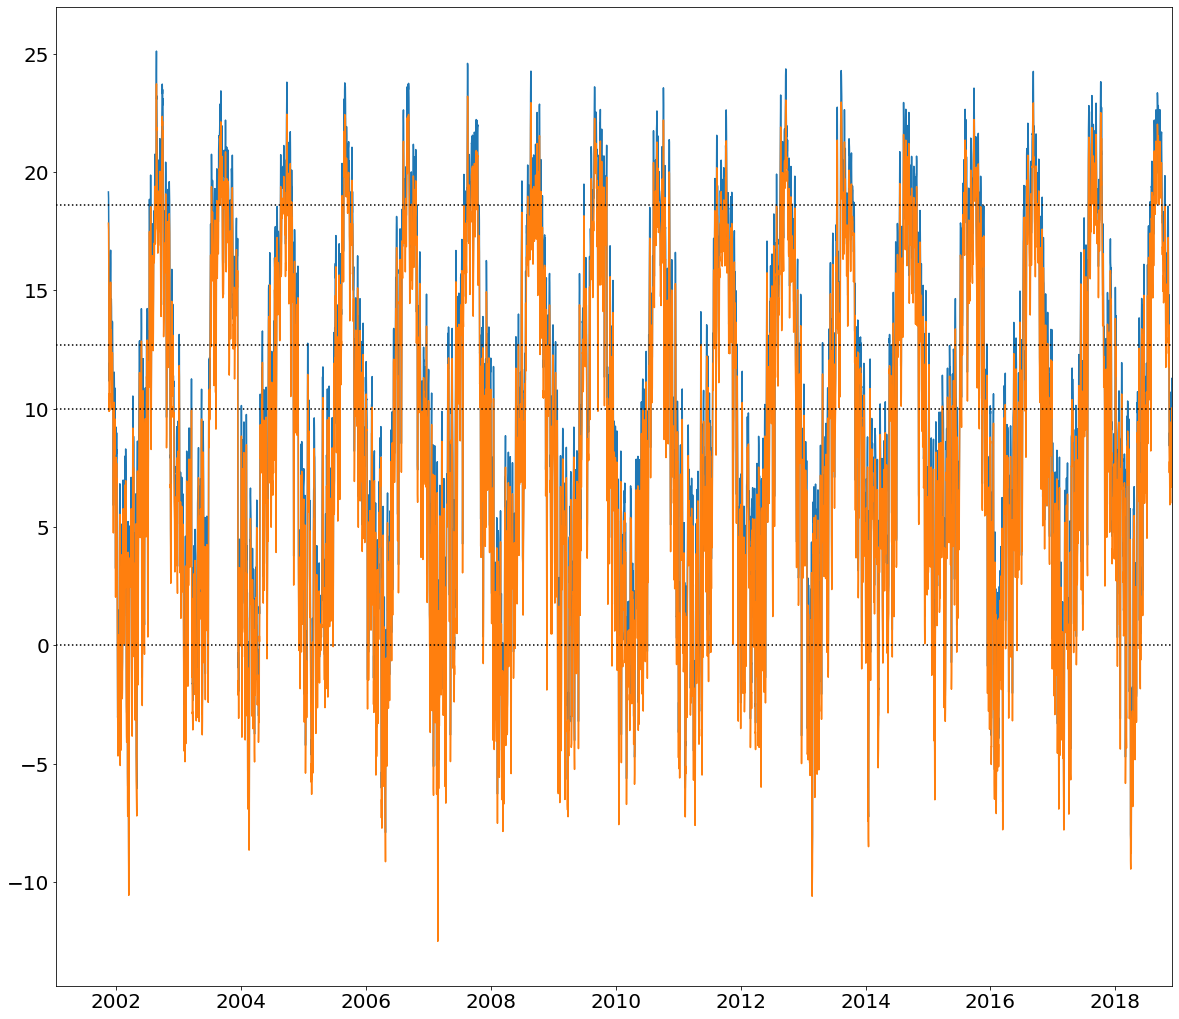

In [21]:

Tmax2 = SubMax  + 0.9* (SubMax  - SubMin)/16.6
Tmin2 = SubMin + 1.8
Tmean=(Tmax2+Tmin2)*.5
Tmean2=(SubMax+SubMin)*.5
fig = plt.figure(figsize=(20,20))
fig.autofmt_xdate()
ax = fig.add_subplot(1,1,1)
#plt.axvline('2017-10-11', color='black',linestyle='dotted')
#plt.axhline(12.78, color='black',linestyle='dotted')
#plt.axvline('2005-04-01', color='black',linestyle='dotted')
plt.xlim(Xlim)
#ax.plot(Times,Tmax2)
#ax.plot(Times,Tmin2)
ax.plot(Times,Tmean)
ax.plot(Times,Tmean2)
ax.axhline(0, color='black',linestyle='dotted')
ax.axhline(12.7, color='black',linestyle='dotted')
ax.axhline(18.6, color='black',linestyle='dotted')
ax.axhline(10.0, color='black',linestyle='dotted')


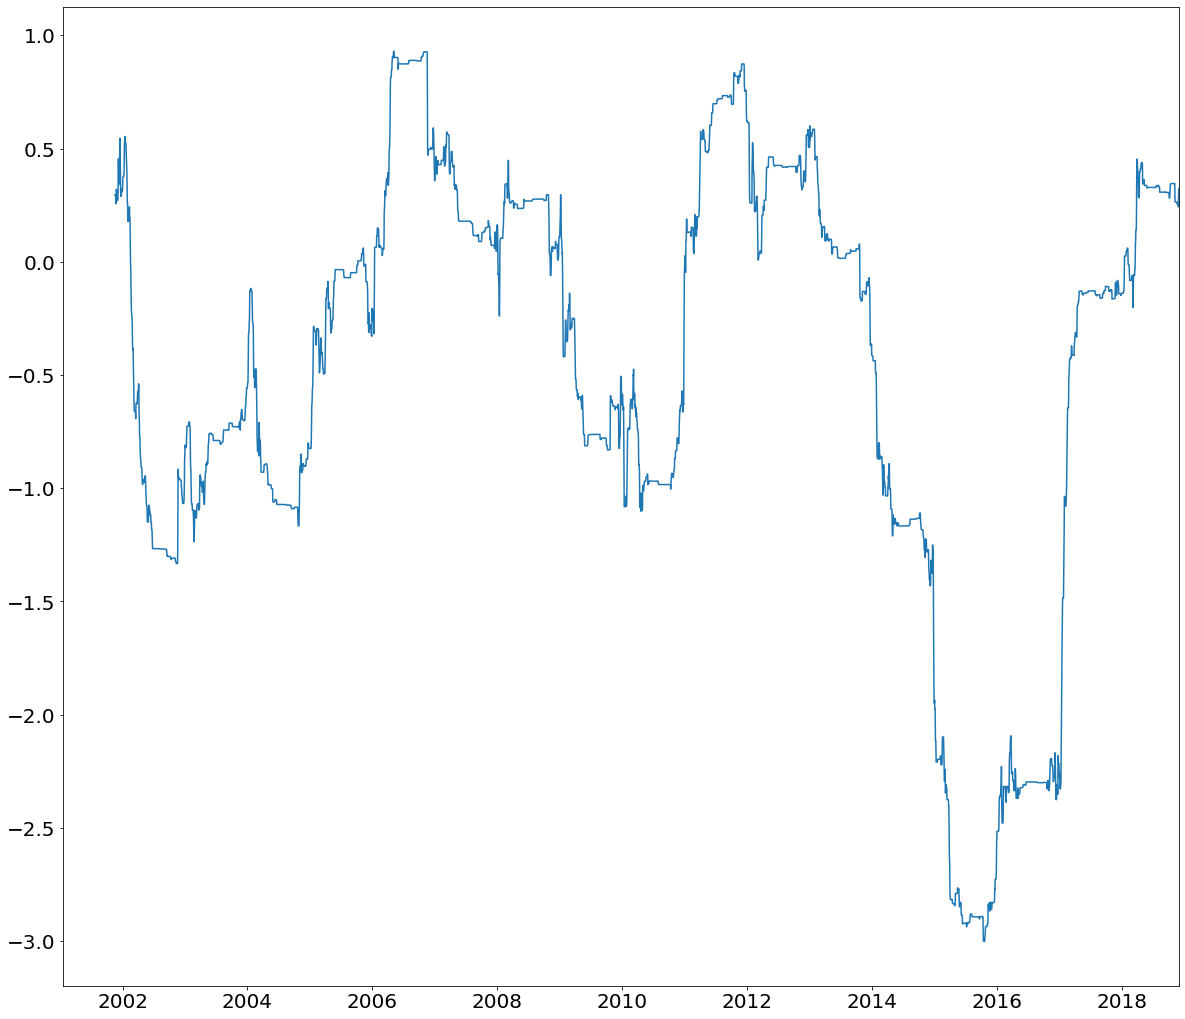

In [22]:
fig = plt.figure(figsize=(20,20))
fig.autofmt_xdate()

ax = fig.add_subplot(1,1,1)
plt.xlim(Xlim)
#plt.ylim(0,2000)
#plt.xlim([datetime.date(2003, 10, 31), datetime.date(2018,1,1)])
ax.plot(Times,CWDvec,label="Fec")


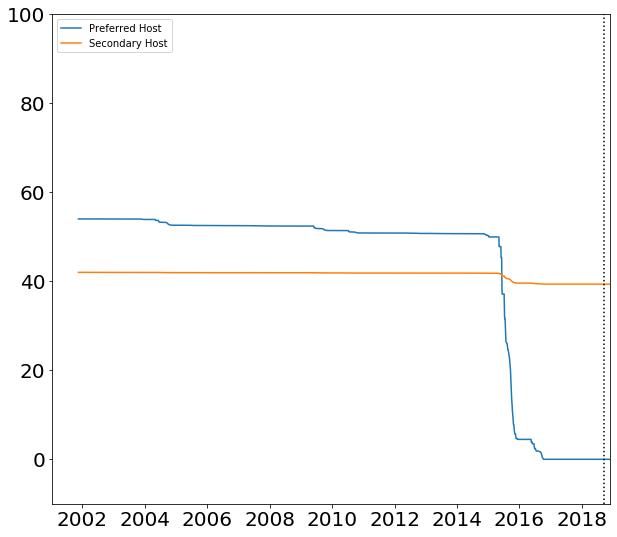

In [23]:

fig = plt.figure(figsize=(10,10))
fig.autofmt_xdate()
ax = fig.add_subplot(1,1,1)
plt.plot(Times,NGEQ20vec,label="Preferred Host")
plt.plot(Times,NGEQ00vec,label="Secondary Host")
plt.axvline('2018-9-11', color='black',linestyle='dotted')
plt.xlim(Xlim)
plt.ylim((-10,100))
plt.legend()


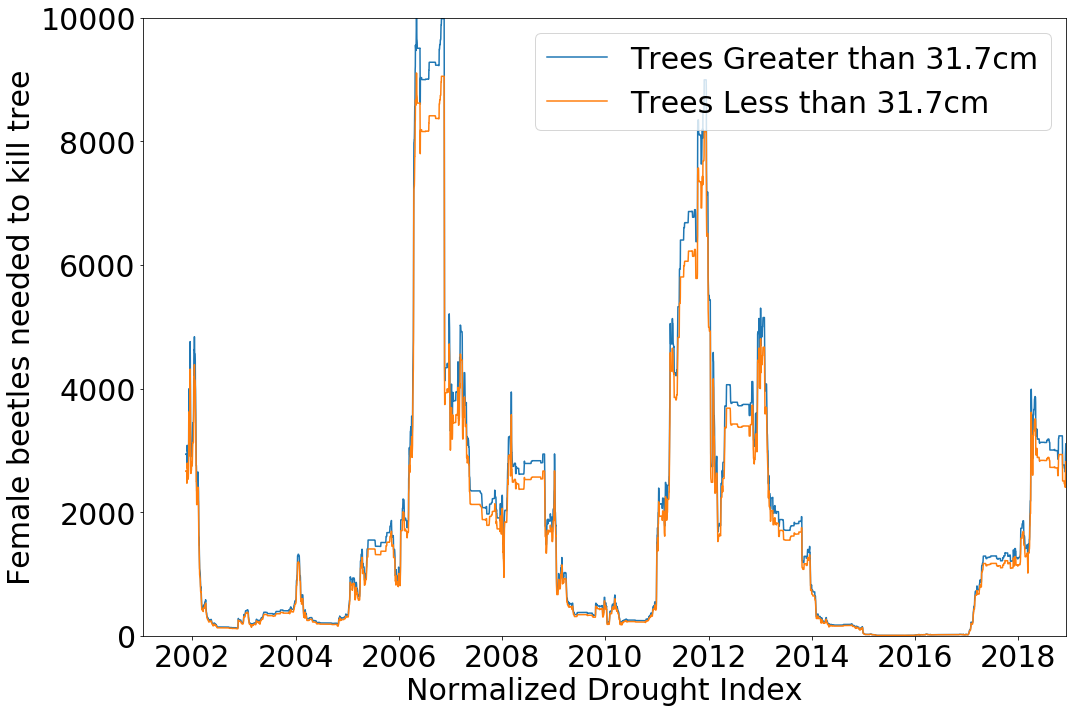

In [24]:
phi1list=[]
phi2list=[]
for i in CWDvec:
    cwd=i
    phi1 = np.exp(x0+x1*cwd+x2*1)
    phi2= np.exp(x0+x1*cwd)
    phi1list=np.append(phi1list,phi1)
    phi2list=np.append(phi2list,phi2)

#print(phi1list)
#print(phi2list)

plt.figure(figsize=(15,10))
plt.xlim(Xlim)
###Plots
plt.plot(Times,phi1list,label="Trees Greater than 31.7cm")
plt.plot(Times,phi2list,label="Trees Less than 31.7cm")
plt.ylim((0,10000))
plt.legend(loc="upper right",fontsize=30)

##Settings
plt.xlabel("Normalized Drought Index",fontsize=30)
plt.ylabel("Female beetles needed to kill tree",fontsize=30)
plt.tick_params(labelsize=30)
plt.tight_layout()
plt.savefig("phiasaproductofSizeanddensity_.png")


In [15]:
np.nanmin(phi1list)
#np.nanmin(phi2list)

1633.8367623018846